In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras import layers, models

(59999, 784)
(59999, 1)
(9999, 784)
(9999, 1)
(59999, 784)
(59999,)
(59999, 28, 28, 1)
(59999,)
(9999, 28, 28, 1)
(9999,)


C:\Users\Tony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Tony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(59999, 10)
(9999, 10)


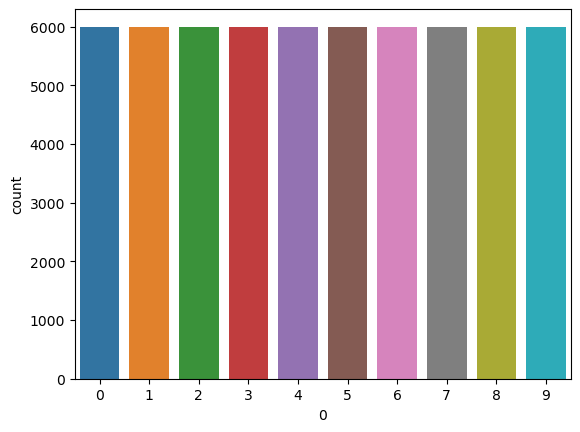

In [36]:
X_train = pd.read_csv(r"C:\Users\Basmala\Desktop\Computer & Data Science\Machine Learning\Arabic Handwritten Digits\csvTrainImages 60k x 784.csv")
Y_train = pd.read_csv(r"C:\Users\Basmala\Desktop\Computer & Data Science\Machine Learning\Arabic Handwritten Digits\csvTrainLabel 60k x 1.csv")
X_test = pd.read_csv(r"C:\Users\Basmala\Desktop\Computer & Data Science\Machine Learning\Arabic Handwritten Digits\csvTestImages 10k x 784.csv")
Y_test = pd.read_csv(r"C:\Users\Basmala\Desktop\Computer & Data Science\Machine Learning\Arabic Handwritten Digits\csvTestLabel 10k x 1.csv")

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

plot_showing = sns.countplot(Y_train.iloc[:,0])
Y_train = Y_train.iloc[:,0]
Y_train.value_counts()

plot_showing_test = sns.countplot(Y_test.iloc[:,0])
Y_test = Y_test.iloc[:,0]
Y_test.value_counts()

X_train.isnull().any().describe()

X_test.isnull().any().describe()

X_train = X_train / 255.0
X_test = X_test / 255.0

print(X_train.shape)
print(Y_train.shape)

X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

num_of_classes = 10
Y_train_encoded = np.eye(num_of_classes)[Y_train]
Y_test_encoded = np.eye(num_of_classes)[Y_test]

Y_train = to_categorical(Y_train, num_classes = num_of_classes)
Y_test  = to_categorical(Y_test , num_classes = num_of_classes)

print(Y_train_encoded.shape)
print(Y_test_encoded.shape)




In [37]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=2)

# Define the CNN model
filter_size = 3  # Customize the filter size
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(filter_size, filter_size), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [38]:
# Train the model
batch_size = 128
epochs = 10

model.fit(X_train,Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val,Y_val))


Epoch 1/10
329/329 [==============================] - 14s 42ms/step - loss: 0.1733 - accuracy: 0.9592 - val_loss: 0.0730 - val_accuracy: 0.9796
Epoch 2/10
329/329 [==============================] - 13s 40ms/step - loss: 0.0534 - accuracy: 0.9847 - val_loss: 0.0527 - val_accuracy: 0.9856
Epoch 3/10
329/329 [==============================] - 13s 41ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0394 - val_accuracy: 0.9886
Epoch 4/10
329/329 [==============================] - 13s 40ms/step - loss: 0.0250 - accuracy: 0.9930 - val_loss: 0.0361 - val_accuracy: 0.9899
Epoch 5/10
329/329 [==============================] - 13s 40ms/step - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.0300 - val_accuracy: 0.9911
Epoch 6/10
329/329 [==============================] - 14s 42ms/step - loss: 0.0143 - accuracy: 0.9958 - val_loss: 0.0300 - val_accuracy: 0.9913
Epoch 7/10
329/329 [==============================] - 14s 42ms/step - loss: 0.0111 - accuracy: 0.9968 - val_loss: 0.0347 - val_accuracy:

In [39]:
# Evaluate the model
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_val, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='macro')
recall = recall_score(y_true, y_pred_classes, average='macro')
f1 = f1_score(y_true, y_pred_classes, average='macro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

563/563 [==============================] - 3s 4ms/step
Accuracy: 0.9923333333333333
Precision: 0.9923734833620174
Recall: 0.9923108350775275
F1-score: 0.9923328250432807
